In [1]:
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import figure

In [2]:
# open floating point file 
floating_cnv_err = []
with open("./datasets/gnp/floating_cnv_err.nst") as f: 
    text = f.read().split('\n')
    text = text[1:]
    parsed_float = map(lambda x: x[1:-1].split(','), text)
    

In [3]:
# open fixed point file 
fixed_cnv_err = []
with open("./datasets/gnp/fixed_cnv_err.nst") as f: 
    text = f.read().split('\n')
    text = text[1:]
    parsed_fixed = map(lambda x: x[1:-1].split(','), text)
    

In [4]:
for el in list(parsed_float)[:-1]: 
    floating_cnv_err.append(float(el[1]))
for el in list(parsed_fixed)[:-1]:
    if int(el[1]) != 0: 
        fixed_cnv_err.append(float(int(el[1]) / (1 << 62)))


[None,
 Text(0, 0.5, 'convergence error [log]'),
 Text(0.5, 0, 'iterations [floating-point]')]

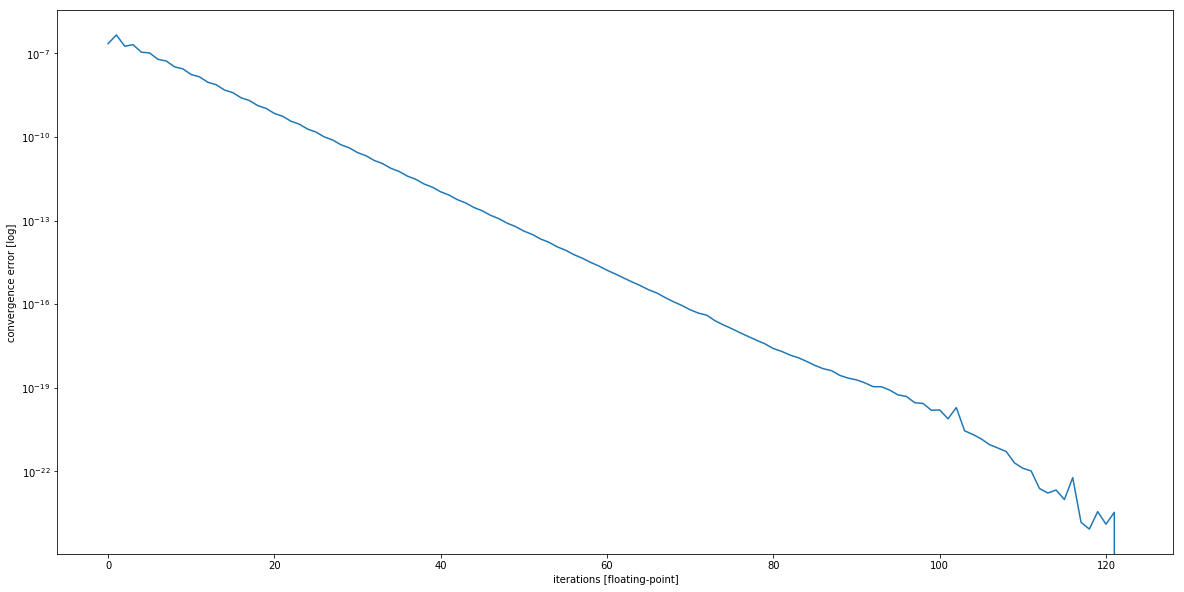

In [7]:
figure(figsize=(20, 10))
ax = sns.lineplot(x = list(range(len(floating_cnv_err))), y = floating_cnv_err)
ax.set(yscale="log", ylabel = "convergence error [log]", xlabel = "iterations [floating-point]")
ax.sav

[None,
 Text(0, 0.5, 'convergence error [log]'),
 Text(0.5, 0, 'iterations [fixed-point]')]

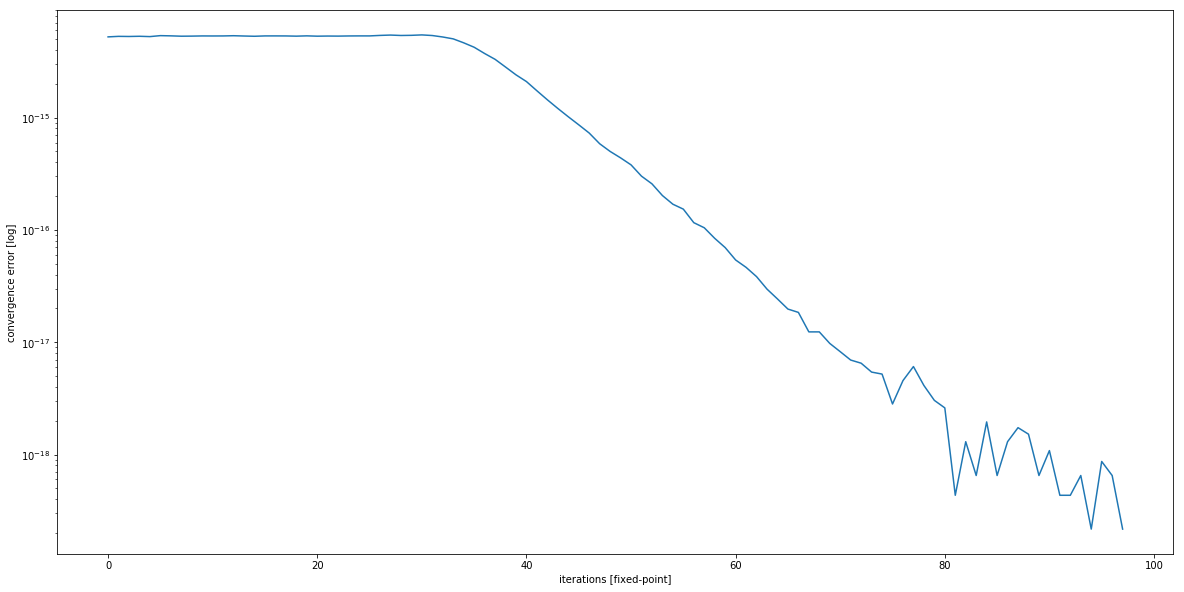

In [8]:
figure(figsize=(20, 10))
ax = sns.lineplot(x=list(range(len(fixed_cnv_err))), y=fixed_cnv_err)
ax.set(yscale="log", xlabel="iterations [fixed-point]", ylabel = "convergence error [log]")